In [204]:
import pandas as pd # obvious imports.
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [206]:
oec = pd.read_csv("oec.csv") # load .csv file

In [207]:
oec # displays csv

,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,...,dec,st_dist,st_optmag,st_optband,gaia_gmag,st_teff,st_mass,st_rad,rowupdate,pl_facility
0,11 Com,b,11 Com b,Radial Velocity,0,1,326.030000,1.290000,0.2310,NaN,...,17.792868,93.37,4.740,V (Johnson),4.372,4742.0,2.70,19.00,14/05/2014,Xinglong Station
1,11 UMi,b,11 UMi b,Radial Velocity,0,1,516.219970,1.530000,0.0800,NaN,...,71.823898,125.72,5.016,V (Johnson),4.500,4213.0,2.78,29.79,06/09/2018,Thueringer Landessternwarte Tautenburg
2,14 And,b,14 And b,Radial Velocity,0,1,185.840000,0.830000,0.0000,NaN,...,39.236198,75.59,5.227,V (Johnson),4.872,4813.0,2.20,11.00,14/05/2014,Okayama Astrophysical Observatory
3,14 Her,b,14 Her b,Radial Velocity,0,1,1773.400020,2.930000,0.3700,NaN,...,43.817646,17.94,6.610,V (Johnson),6.379,5338.0,0.90,0.93,06/09/2018,W. M. Keck Observatory
4,16 Cyg B,b,16 Cyg B b,Radial Velocity,0,1,798.500000,1.660000,0.6800,NaN,...,50.517525,21.41,6.250,V (Johnson),6.057,5750.0,1.08,1.13,06/09/2018,Multiple Observatories
5,18 Del,b,18 Del b,Radial Velocity,0,1,993.300000,2.600000,0.0800,NaN,...,10.839286,76.38,5.506,V (Johnson),5.244,4979.0,2.30,8.50,14/05/2014,Okayama Astrophysical Observatory
6,1RXS J160929.1-210524,b,1RXS J160929.1-210524 b,Imaging,0,1,NaN,330.000000,NaN,NaN,...,-21.083036,145.00,NaN,NaN,12.057,4060.0,0.85,NaN,01/04/2015,Gemini Observatory
7,24 Boo,b,24 Boo b,Radial Velocity,0,1,30.350600,0.190000,0.0420,NaN,...,49.844852,96.25,5.580,V (Johnson),5.305,4893.0,0.99,10.64,26/04/2018,Okayama Astrophysical Observatory
8,24 Sex,b,24 Sex b,Radial Velocity,0,2,452.800000,1.333000,0.0900,NaN,...,-0.902244,72.21,6.441,V (Johnson),6.198,5098.0,1.54,4.90,14/05/2014,Lick Observatory
9,24 Sex,c,24 Sex c,Radial Velocity,0,2,883.000000,2.080000,0.2900,NaN,...,-0.902244,72.21,6.441,V (Johnson),6.198,5098.0,1.54,4.90,14/05/2014,Lick Observatory


In [208]:
massPeriod = oec[['pl_orbper','pl_bmassj','pl_discmethod']] # creates dataframe with 3 columns we want
massPeriod

,pl_orbper,pl_bmassj,pl_discmethod
0,326.030000,19.40000,Radial Velocity
1,516.219970,14.74000,Radial Velocity
2,185.840000,4.80000,Radial Velocity
3,1773.400020,4.66000,Radial Velocity
4,798.500000,1.78000,Radial Velocity
5,993.300000,10.30000,Radial Velocity
6,NaN,8.00000,Imaging
7,30.350600,0.91000,Radial Velocity
8,452.800000,1.99000,Radial Velocity
9,883.000000,0.86000,Radial Velocity


In [209]:

discoveryMethod.unique() # IDENTIFY UNIQUE VALUES FOR FUNCTION BELOW.

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Orbital Brightness Modulation',
       'Pulsation Timing Variations', 'Microlensing',
       'Transit Timing Variations', 'Pulsar Timing'], dtype=object)

In [210]:
def StringToNum(dataFrame): # function which re-maps the string to numbers to color, for a clearer graph.
    
    for i in range(len(dataFrame)):
        
        if dataFrame.loc[i, 'pl_discmethod'] == 'Radial Velocity':
            dataFrame.at[i , 'pl_discmethod'] = 1
            
        elif dataFrame.loc[i, 'pl_discmethod'] == 'Transit':
            dataFrame.at[i , 'pl_discmethod'] = 2
            
        elif dataFrame.loc[i, 'pl_discmethod'] == 'Microlensing':
            dataFrame.at[i , 'pl_discmethod'] = 3
            
        elif dataFrame.loc[i, 'pl_discmethod'] == 'Imaging':
            dataFrame.at[i , 'pl_discmethod'] = 4
            
        elif dataFrame.loc[i, 'pl_discmethod'] == 'Astrometry':
            dataFrame.at[i , 'pl_discmethod'] = 5
            
        elif dataFrame.loc[i, 'pl_discmethod'] == 'Eclipse Timing Variations':
            dataFrame.at[i , 'pl_discmethod'] = 6
            
        elif dataFrame.loc[i, 'pl_discmethod'] == 'Transit Timing Variations':
            dataFrame.at[i , 'pl_discmethod'] = 7
            
        elif dataFrame.loc[i, 'pl_discmethod'] == 'Pulsar Timing':
            dataFrame.at[i , 'pl_discmethod'] = 8
            
        elif dataFrame.loc[i, 'pl_discmethod'] == 'Orbital Brightness Modulation':
            dataFrame.at[i , 'pl_discmethod'] = 9
            
        elif dataFrame.loc[i, 'pl_discmethod'] == 'Pulsation Timing Variations':
            dataFrame.at[i , 'pl_discmethod'] = 10
            

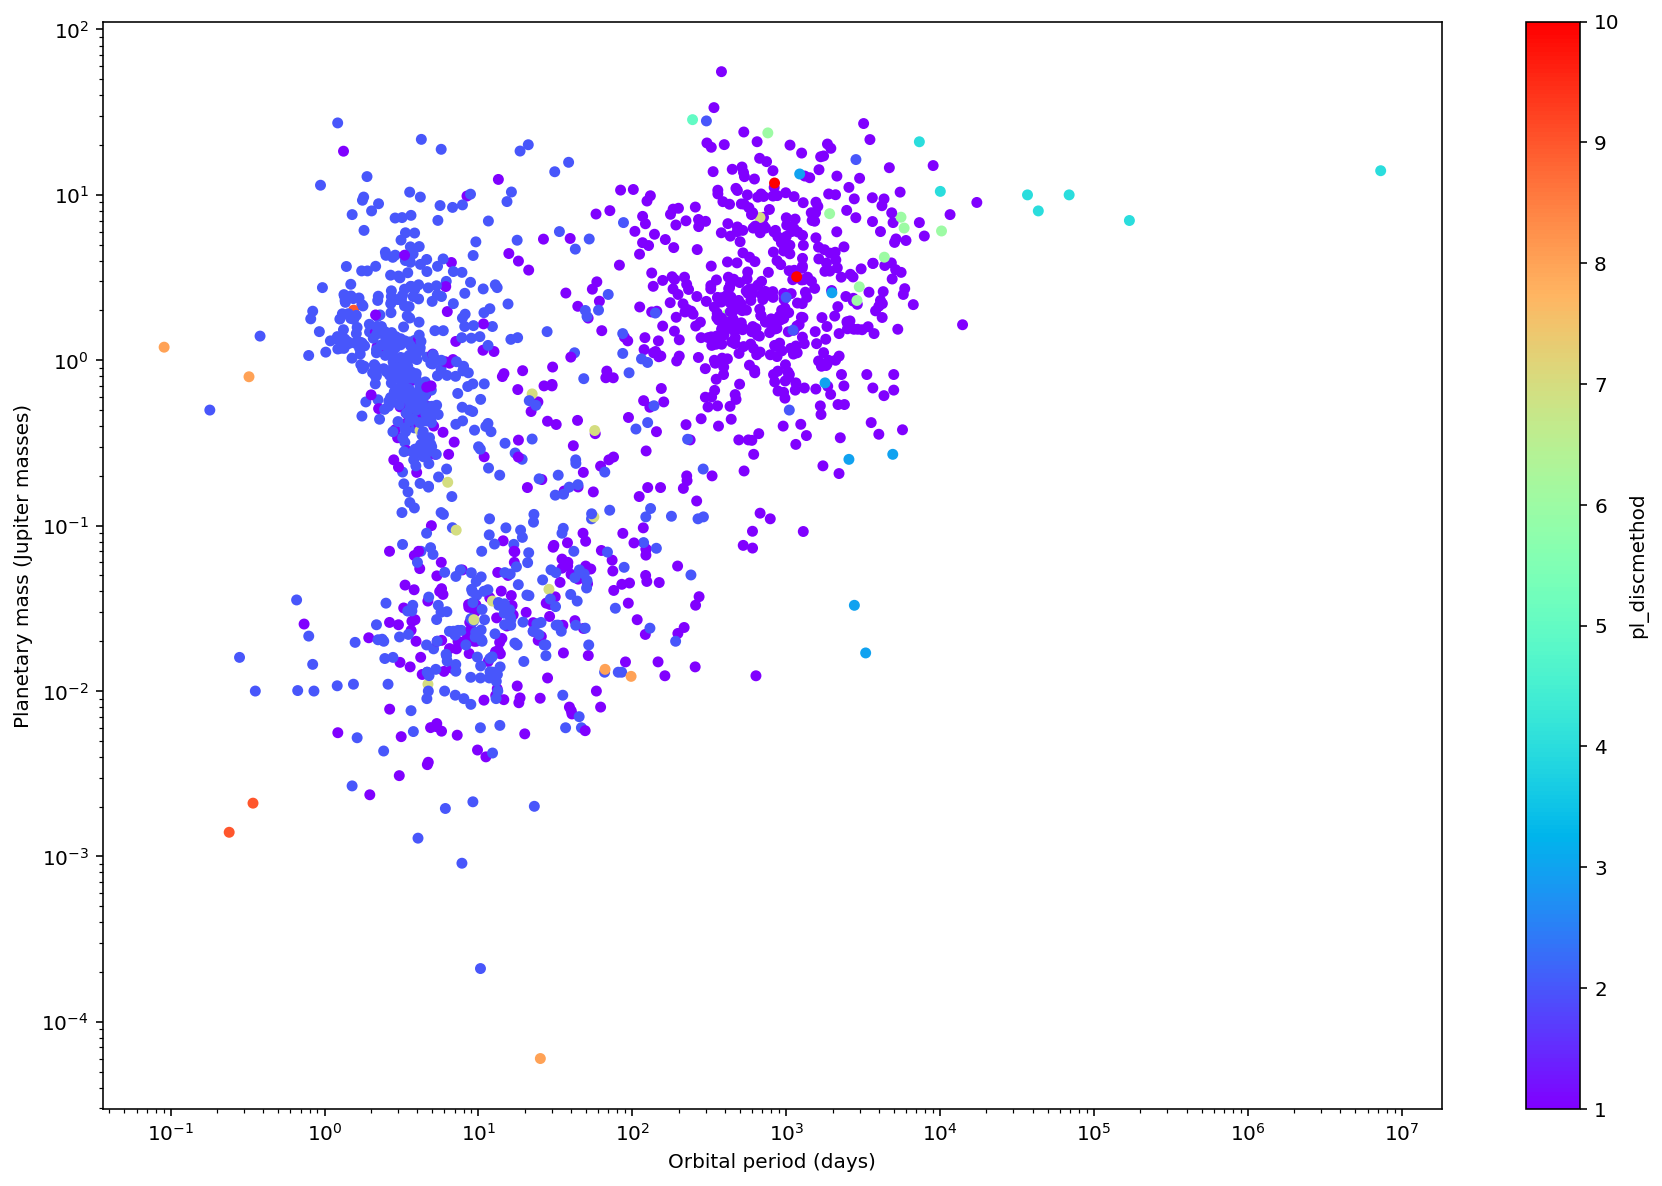

In [211]:
StringToNum(massPeriod)
massPeriod = massPeriod[pd.notnull(massPeriod['pl_orbper'])] #Removes planets which do not have a recorded orbital period
massPeriod = massPeriod[pd.notnull(massPeriod['pl_bmassj'])] #Removes planets which do not have a recorded mass

fig, ax2 = plt.subplots()
ax2.set_yscale('log')
ax2.set_xscale('log')

fig = massPeriod.plot.scatter('pl_orbper','pl_bmassj', c = 'pl_discmethod', colormap='rainbow', ax = ax2 , figsize =(15,10)) #Plots scatter graph
fig.set_ylabel('Planetary mass (Jupiter masses)')
fig.set_xlabel('Orbital period (days)')
plt.show()


"Hot Jupiters are a class of gas giant exoplanets that are inferred to be physically similar to Jupiter but that have very short orbital periods. The close proximity to their stars and high surface-atmosphere temperatures resulted in the moniker 'hot Jupiters'" - Top left cluster - hot jupiters, Top right are cool jupiters and bottom cluster are "super-earths"

In [135]:
semiMajorAxisOrbitalPeriod = oec[["pl_orbsmax", "pl_orbper"]]

semiMajorAxisOrbitalPeriod = semiMajorAxisOrbitalPeriod[pd.notnull(semiMajorAxisOrbitalPeriod['pl_orbsmax'])]
semiMajorAxisOrbitalPeriod = semiMajorAxisOrbitalPeriod[pd.notnull(semiMajorAxisOrbitalPeriod['pl_orbper'])] #Removes planets which do not have a recorded orbital period

semiMajorAxisOrbitalPeriod

,pl_orbsmax,pl_orbper
0,1.290000,326.030000
1,1.530000,516.219970
2,0.830000,185.840000
3,2.930000,1773.400020
4,1.660000,798.500000
5,2.600000,993.300000
7,0.190000,30.350600
8,1.333000,452.800000
9,2.080000,883.000000
14,0.920000,416.000000


In [136]:
semiMajorAxisOrbitalPeriod["pl_orbsmaxCubed"] = semiMajorAxisOrbitalPeriod["pl_orbsmax"] ** 3
semiMajorAxisOrbitalPeriod["pl_orbperSquared"] = semiMajorAxisOrbitalPeriod["pl_orbper"] ** 2

semiMajorAxisOrbitalPeriod = semiMajorAxisOrbitalPeriod[semiMajorAxisOrbitalPeriod['pl_orbsmaxCubed'] < 300] #Restricts max value on axis
semiMajorAxisOrbitalPeriod = semiMajorAxisOrbitalPeriod[semiMajorAxisOrbitalPeriod['pl_orbperSquared'] < 40000000] #Restricts max value on axis

TypeError: You must first set_array for mappable

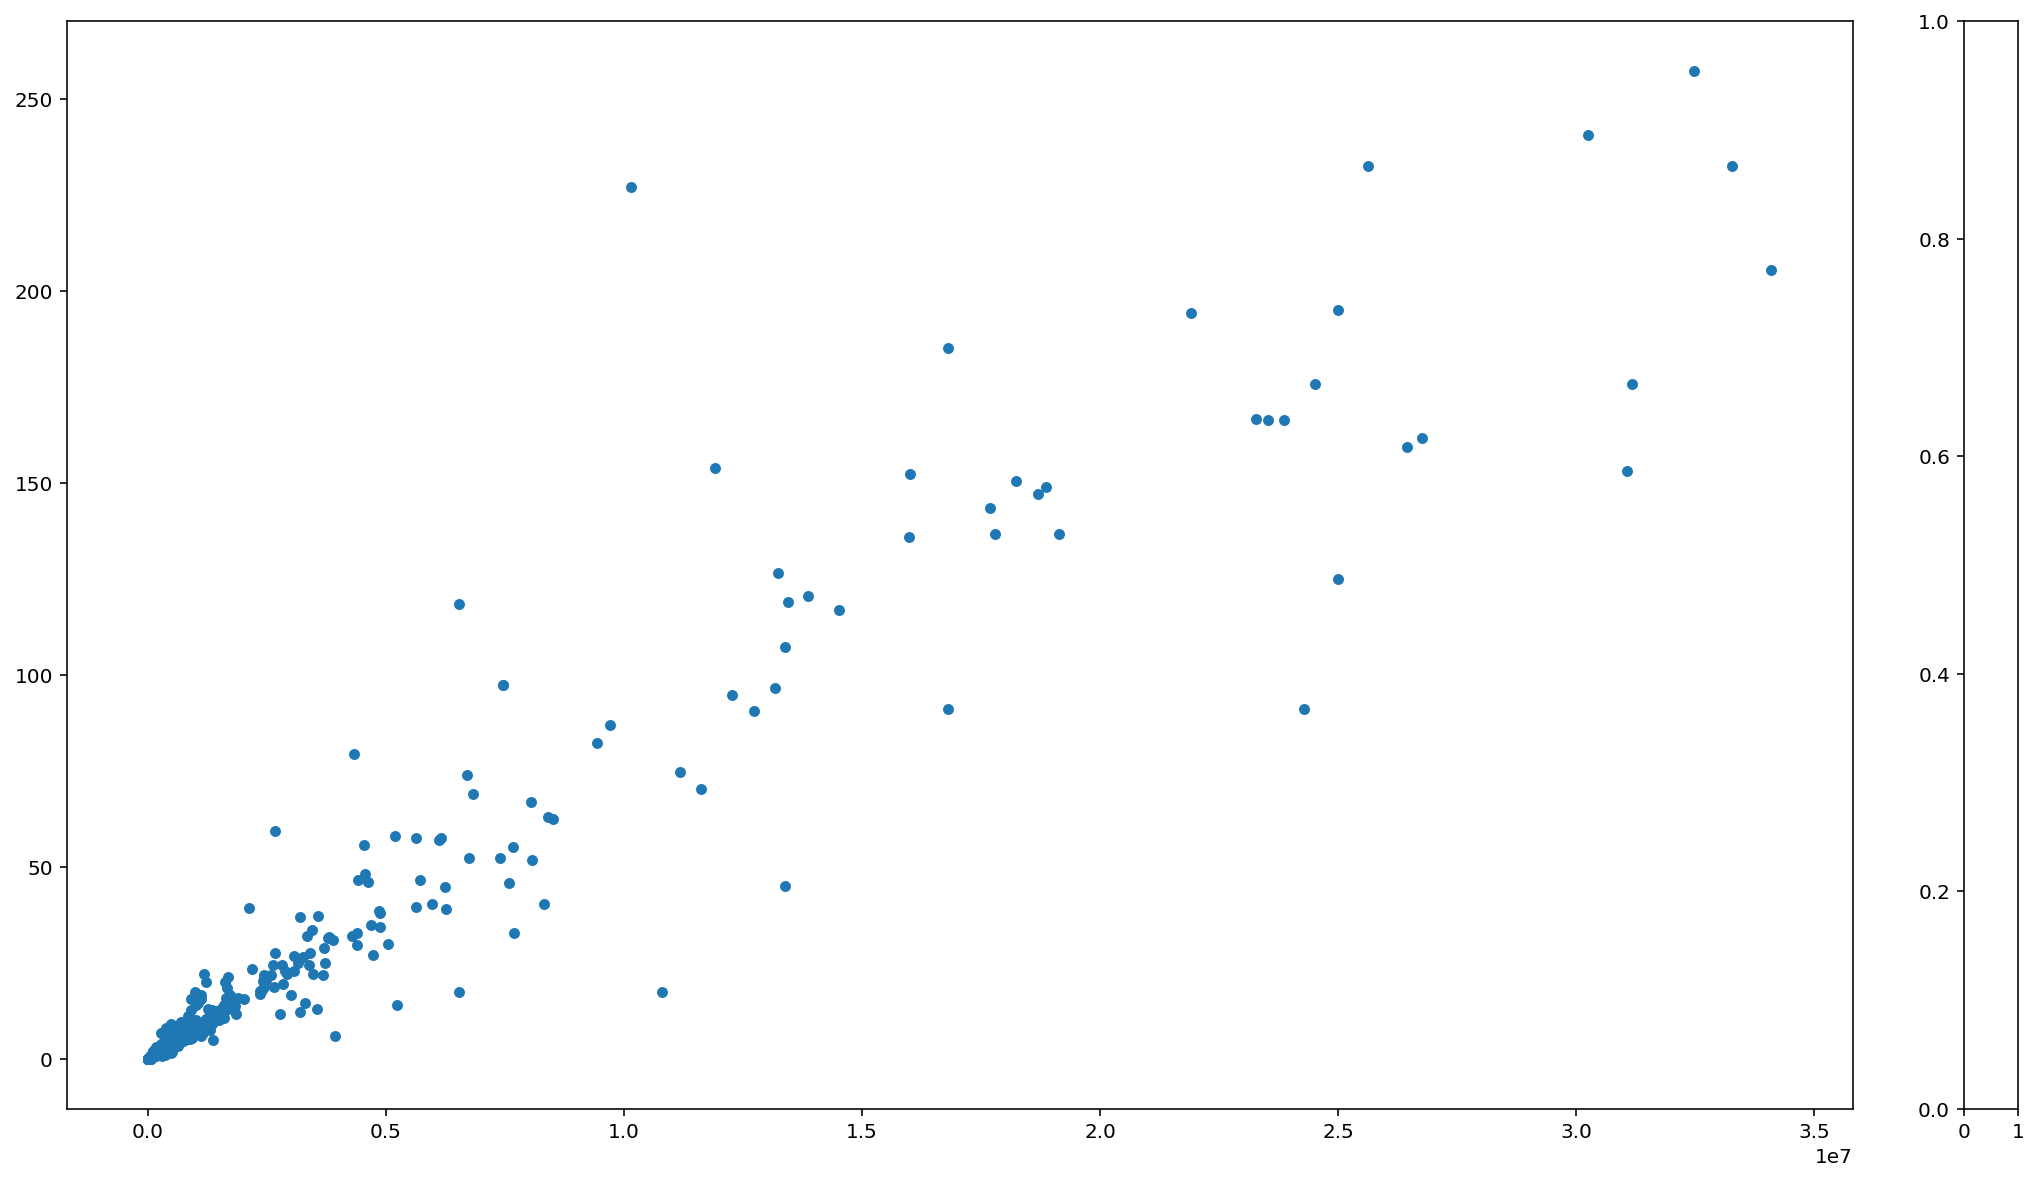

In [198]:
fig = semiMajorAxisOrbitalPeriod.plot.scatter("pl_orbperSquared", "pl_orbsmaxCubed", figsize=(20,10)) #Plots scatter graph
fig.set_xlabel("Orbital period squared (days)")
fig.set_ylabel("Semi-major axis cubed (AU)")

The above graph..

In [138]:
eccentricityPeriod = oec[["pl_orbeccen", "pl_orbper", "pl_discmethod"]] # creates datafram for the 3 selected columns shown.
StringToNum(eccentricityPeriod)

eccentricityPeriod = eccentricityPeriod[pd.notnull(eccentricityPeriod['pl_orbeccen'])]
eccentricityPeriod = eccentricityPeriod[pd.notnull(eccentricityPeriod['pl_orbper'])] #Removes planets which do not have a recorded orbital period
eccentricityPeriod = eccentricityPeriod[pd.notnull(eccentricityPeriod['pl_discmethod'])]

In [139]:
eccentricityPeriod = eccentricityPeriod[eccentricityPeriod['pl_orbper'] < 40000]

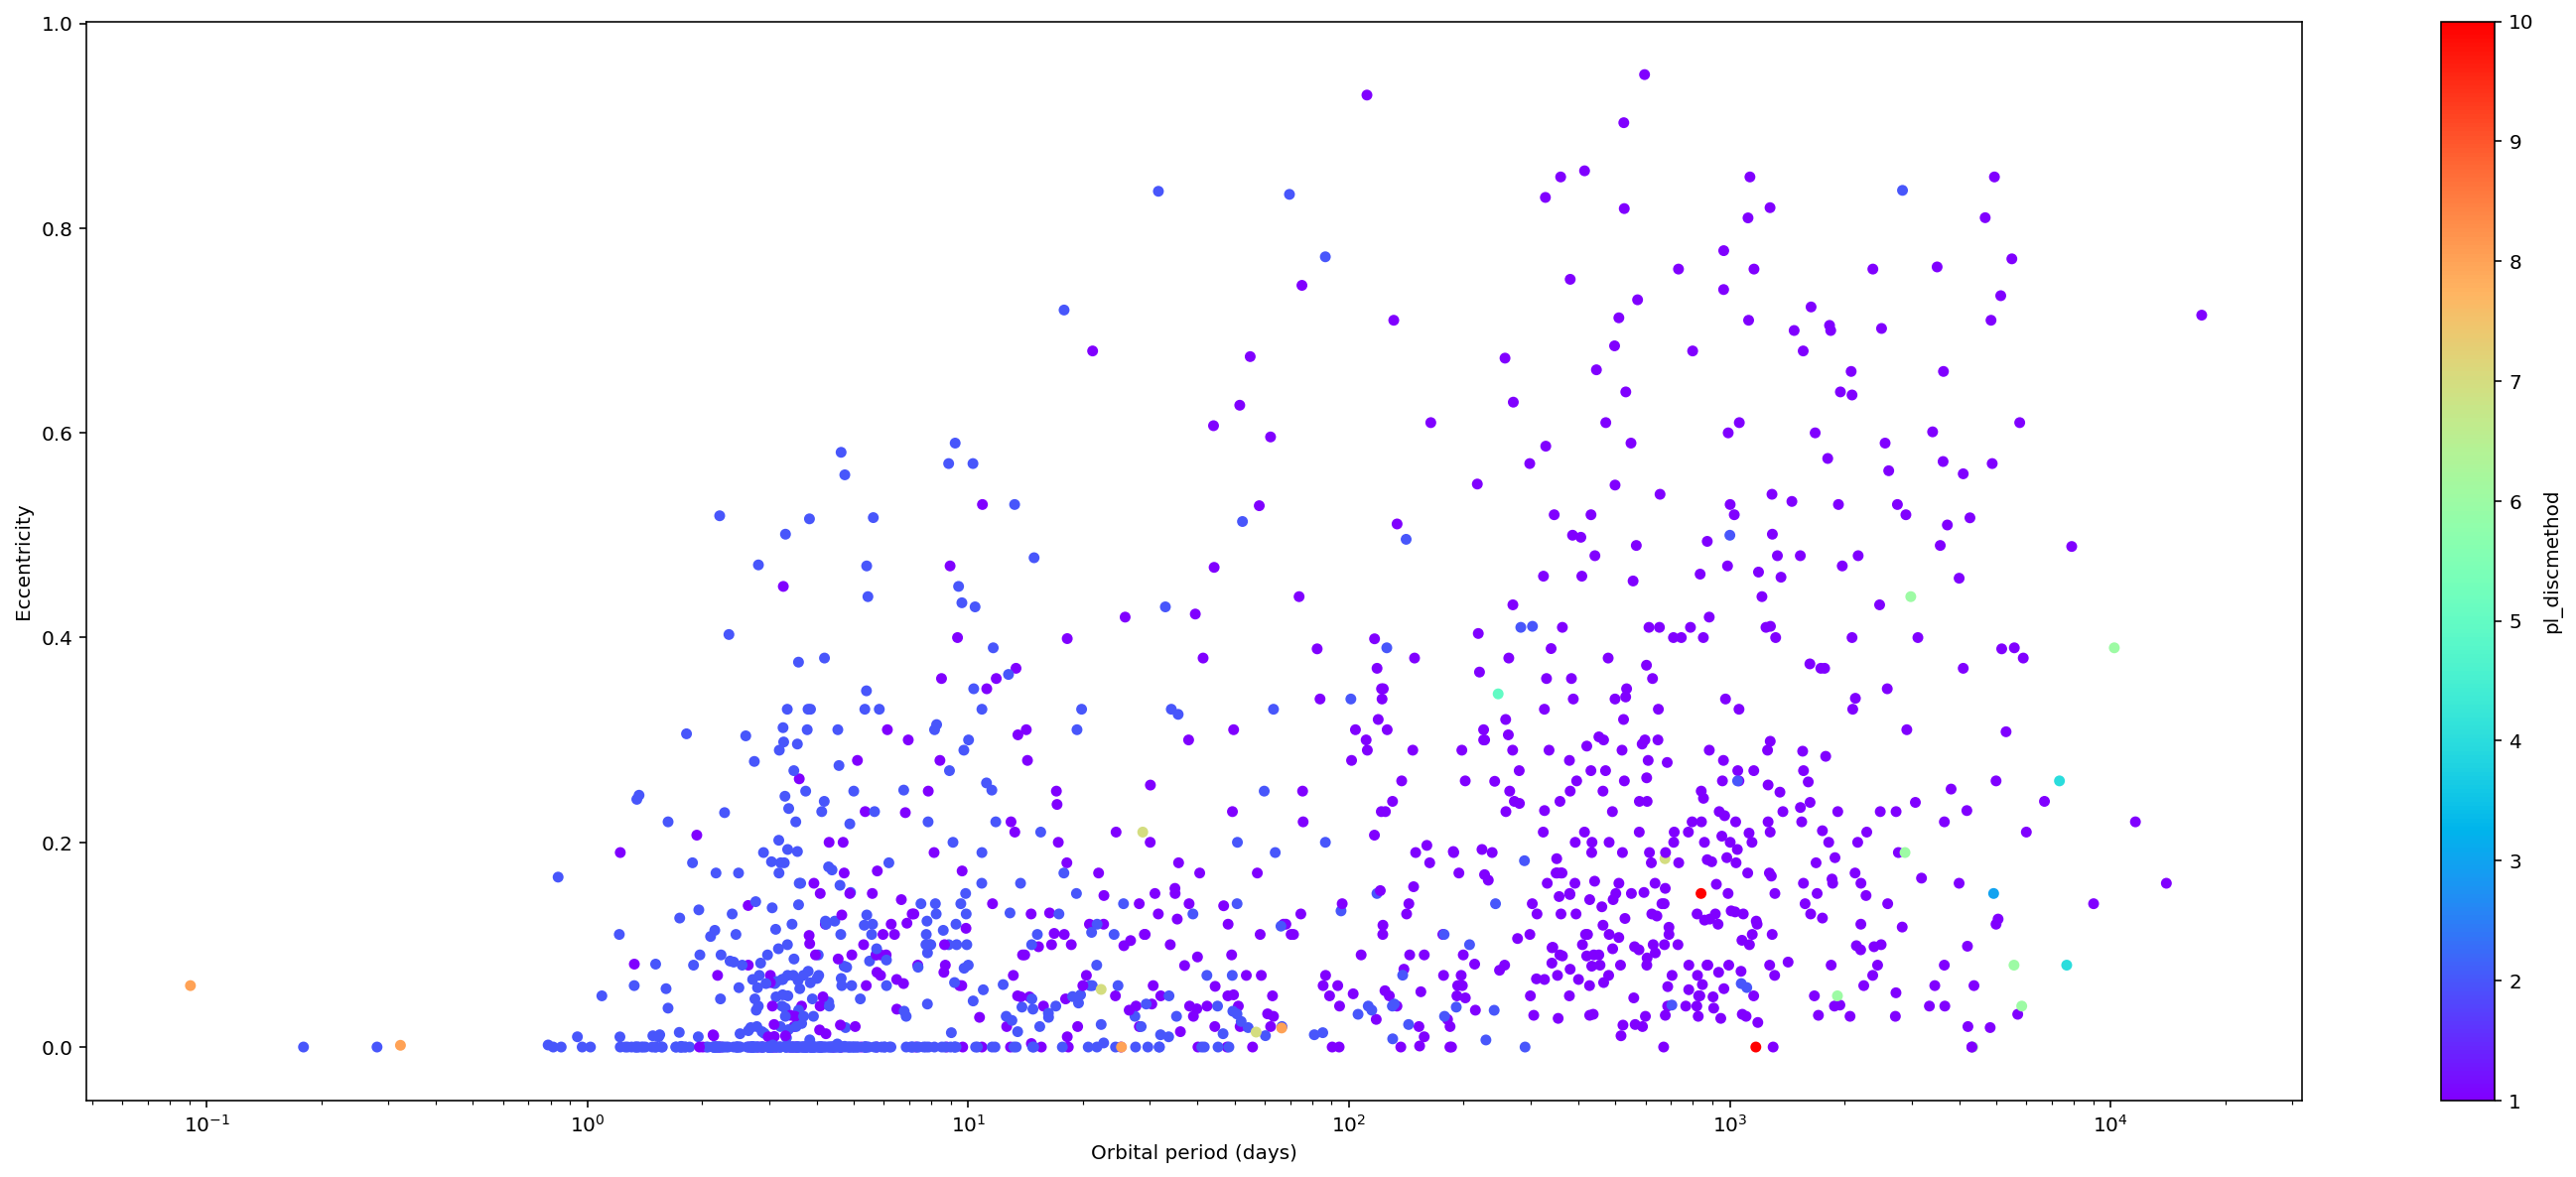

In [201]:
fig, ax = plt.subplots()
eccentricityPeriod.plot(kind='scatter',x='pl_orbper', y='pl_orbeccen', c='pl_discmethod', ax=ax, colormap='rainbow',figsize=(25, 10)) #Plots scatter graph
ax.set_xlabel("pl_orbper")
ax.set_xscale("log")
ax.set_ylabel("Eccentricity")
ax.set_xlabel("Orbital period (days)")
plt.show()

The above graph..

In [141]:
massSemiMajor = oec[["pl_orbsmax", "pl_bmassj", "pl_discmethod"]]
StringToNum(massSemiMajor)

massSemiMajor = massSemiMajor[pd.notnull(massSemiMajor['pl_orbsmax'])]
massSemiMajor = massSemiMajor[pd.notnull(massSemiMajor['pl_bmassj'])]
massSemiMajor = massSemiMajor[pd.notnull(massSemiMajor['pl_discmethod'])]

,pl_orbsmax,pl_bmassj,pl_discmethod
0,1.290000,19.40000,1
1,1.530000,14.74000,1
2,0.830000,4.80000,1
3,2.930000,4.66000,1
4,1.660000,1.78000,1
5,2.600000,10.30000,1
6,330.000000,8.00000,4
7,0.190000,0.91000,1
8,1.333000,1.99000,1
9,2.080000,0.86000,1


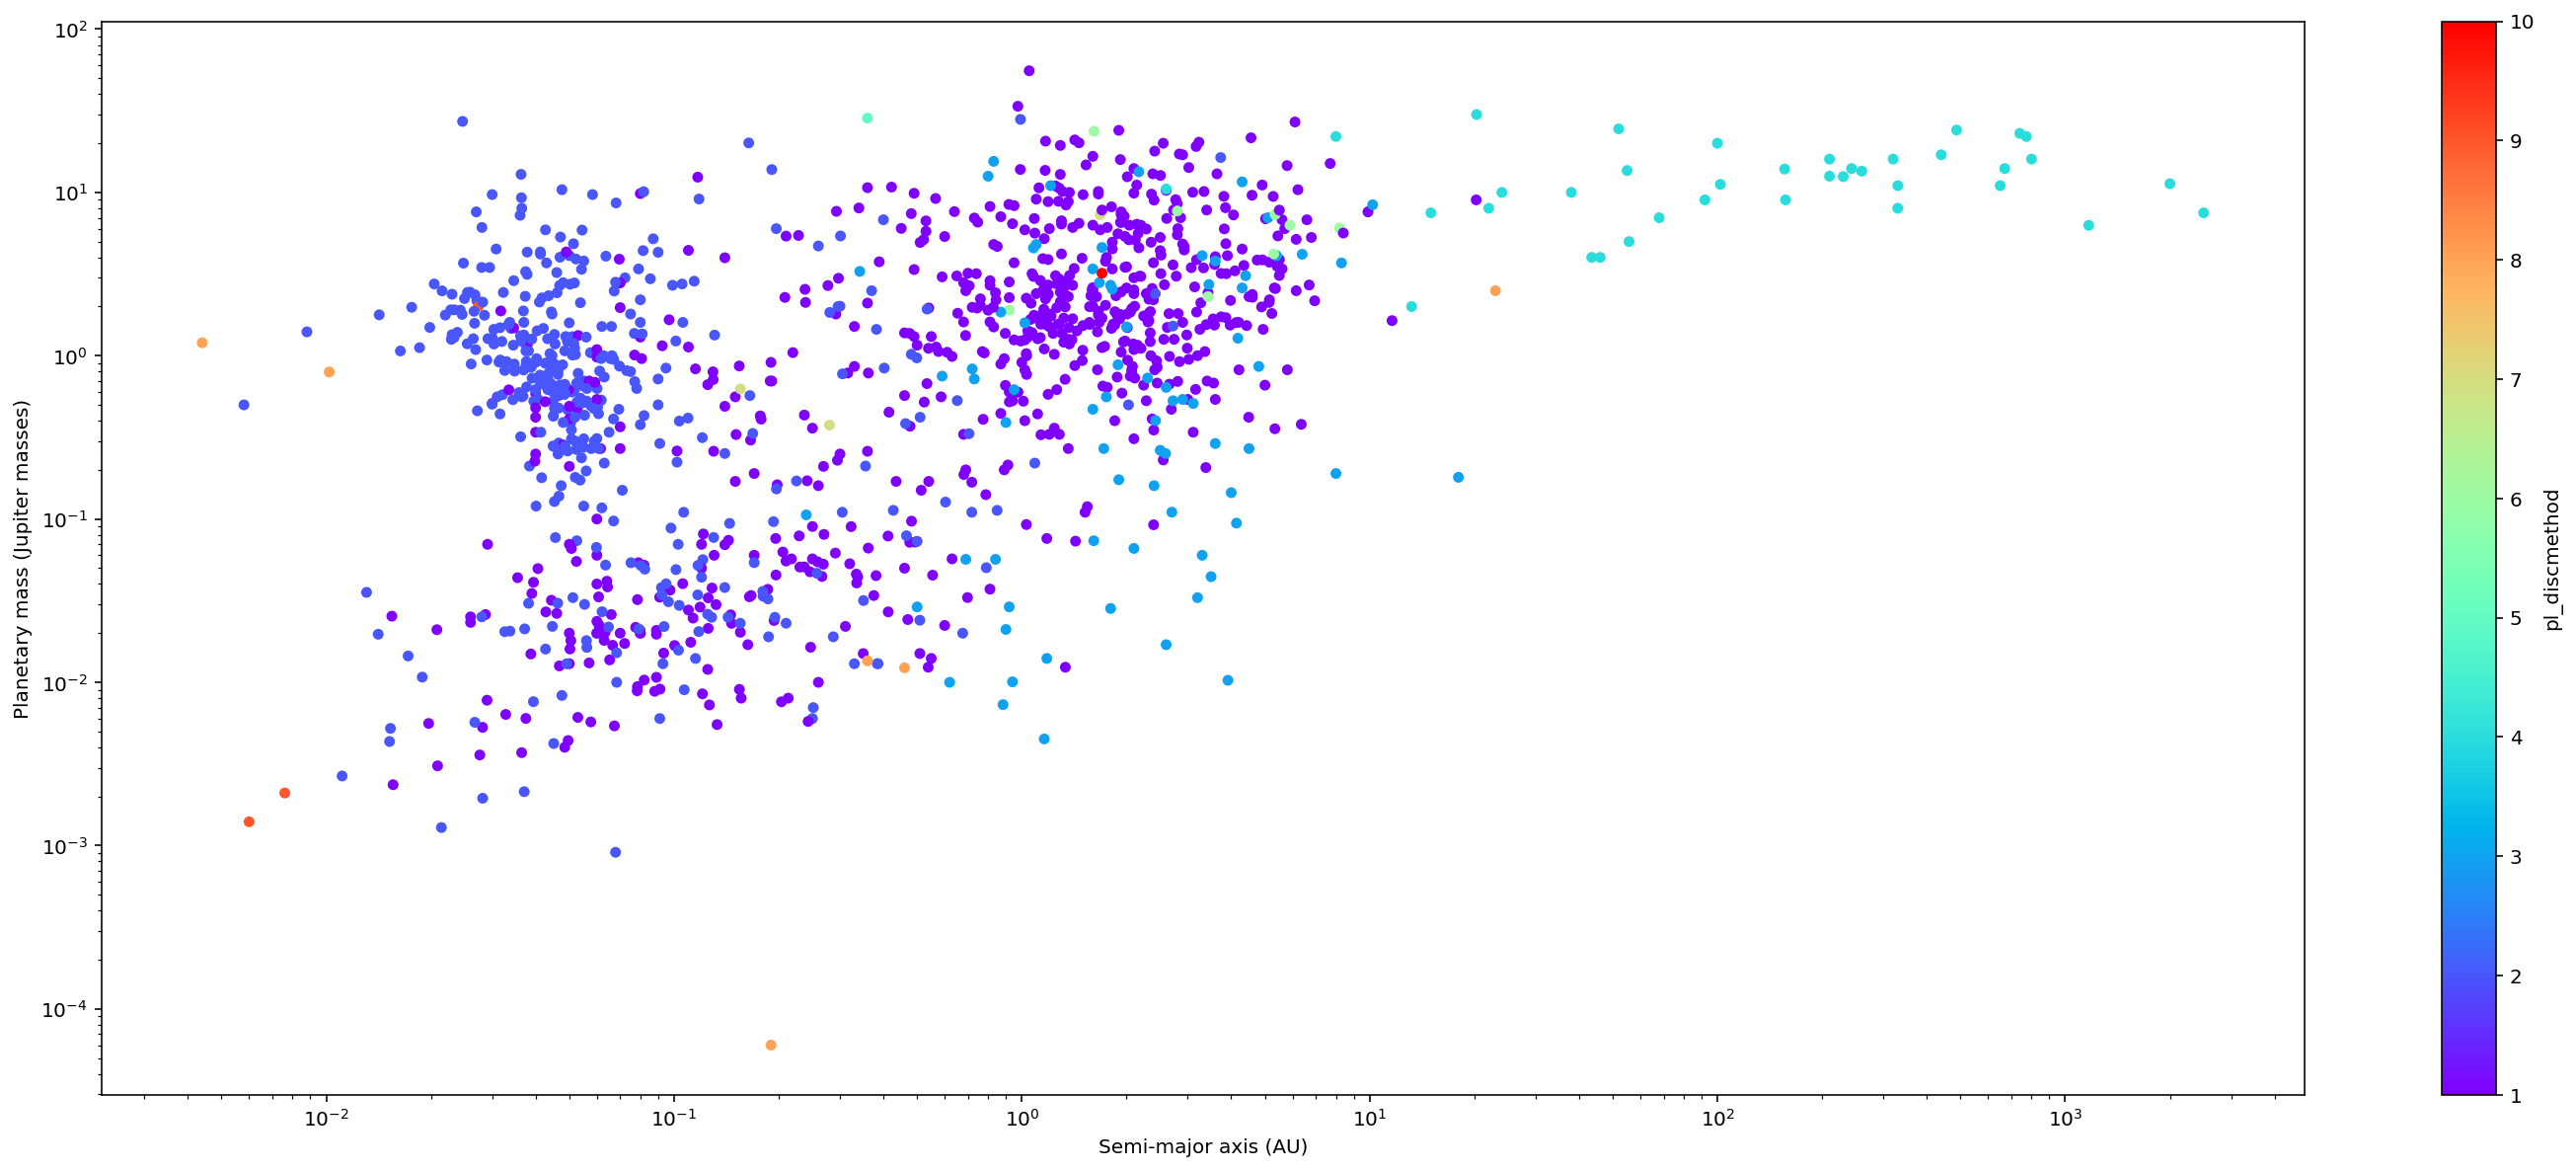

In [202]:
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
massSemiMajor.plot(kind='scatter',x='pl_orbsmax', y='pl_bmassj', c='pl_discmethod', ax=ax, colormap='rainbow',figsize=(25, 10)) #Plots scatter graph
ax.set_xlabel("Semi-major axis (AU)")
ax.set_ylabel("Planetary mass (Jupiter masses)")
plt.show()
# for new graph plot radius against orbital period. - radius column is called = pl_radiusj

The above graph..

In [171]:
periodRadius = oec[["pl_orbper", "pl_radj", "pl_discmethod"]]
StringToNum(periodRadius)

periodRadius = periodRadius[pd.notnull(periodRadius['pl_orbper'])]
periodRadius = periodRadius[pd.notnull(periodRadius["pl_radj"])]
periodRadius = periodRadius[pd.notnull(periodRadius["pl_discmethod"])]

periodRadius

,pl_orbper,pl_radj,pl_discmethod
15,7336.500000,0.920,4
28,0.736539,0.170,1
48,41.685500,0.230,2
63,1.508956,1.490,2
64,13.240600,0.970,2
65,2.994330,1.430,2
66,2.828042,1.440,2
67,4.035190,0.885,2
68,1.512140,1.090,2
69,5.352270,1.170,2


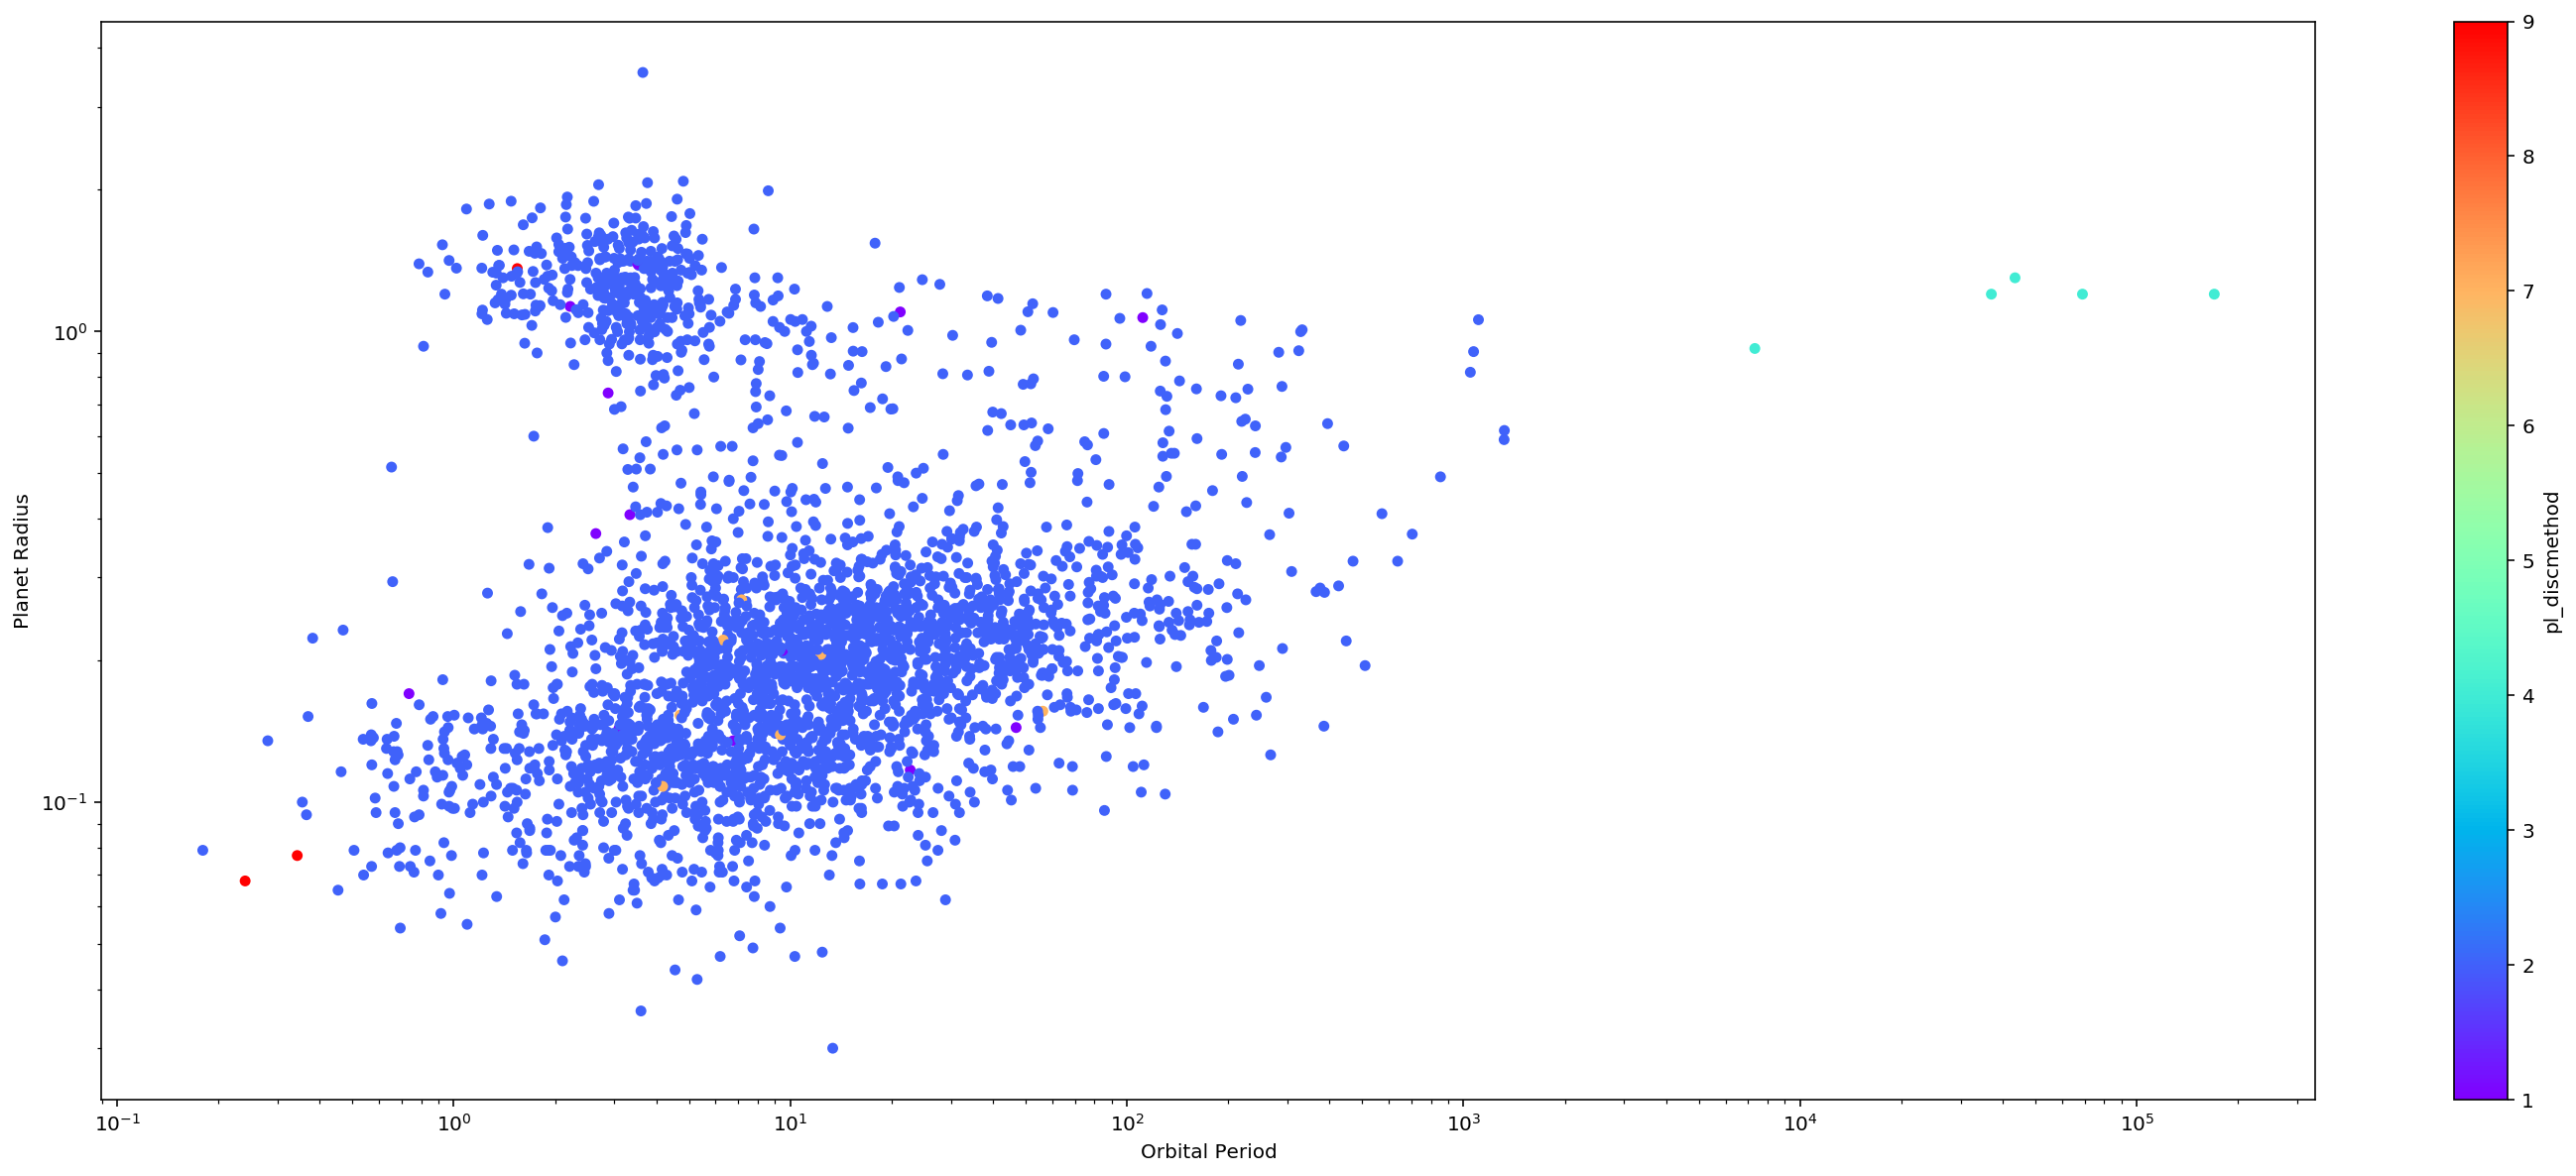

In [205]:
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
periodRadius.plot(kind='scatter',x='pl_orbper', y="pl_radj", c='pl_discmethod', ax=ax, colormap='rainbow',figsize=(25, 10)) #Plots scatter graph
ax.set_xlabel("Orbital Period")
ax.set_ylabel("Planet Radius")
plt.show()
# for new graph plot radius against orbital period. - radius column is called = pl_radiusj

In [152]:
radiusPeriod = oec[["pl_orbsmax", "pl_orbper", "pl_discmethod"]]
StringToNum(radiusPeriod)

radiusPeriod = radiusPeriod[pd.notnull(radiusPeriod['pl_orbsmax'])]
radiusPeriod = radiusPeriod[pd.notnull(radiusPeriod['pl_orbper'])] #Removes planets which do not have a recorded orbital period
radiusPeriod = radiusPeriod[pd.notnull(radiusPeriod['pl_discmethod'])]

,pl_orbsmax,pl_orbper,pl_discmethod
0,1.290000,326.030000,1
1,1.530000,516.219970,1
2,0.830000,185.840000,1
3,2.930000,1773.400020,1
4,1.660000,798.500000,1
5,2.600000,993.300000,1
7,0.190000,30.350600,1
8,1.333000,452.800000,1
9,2.080000,883.000000,1
14,0.920000,416.000000,6


In [216]:
radiusPeriod = radiusPeriod[radiusPeriod['pl_orbsmax'] < 10]
radiusPeriod = radiusPeriod[radiusPeriod['pl_orbper'] < 5000]

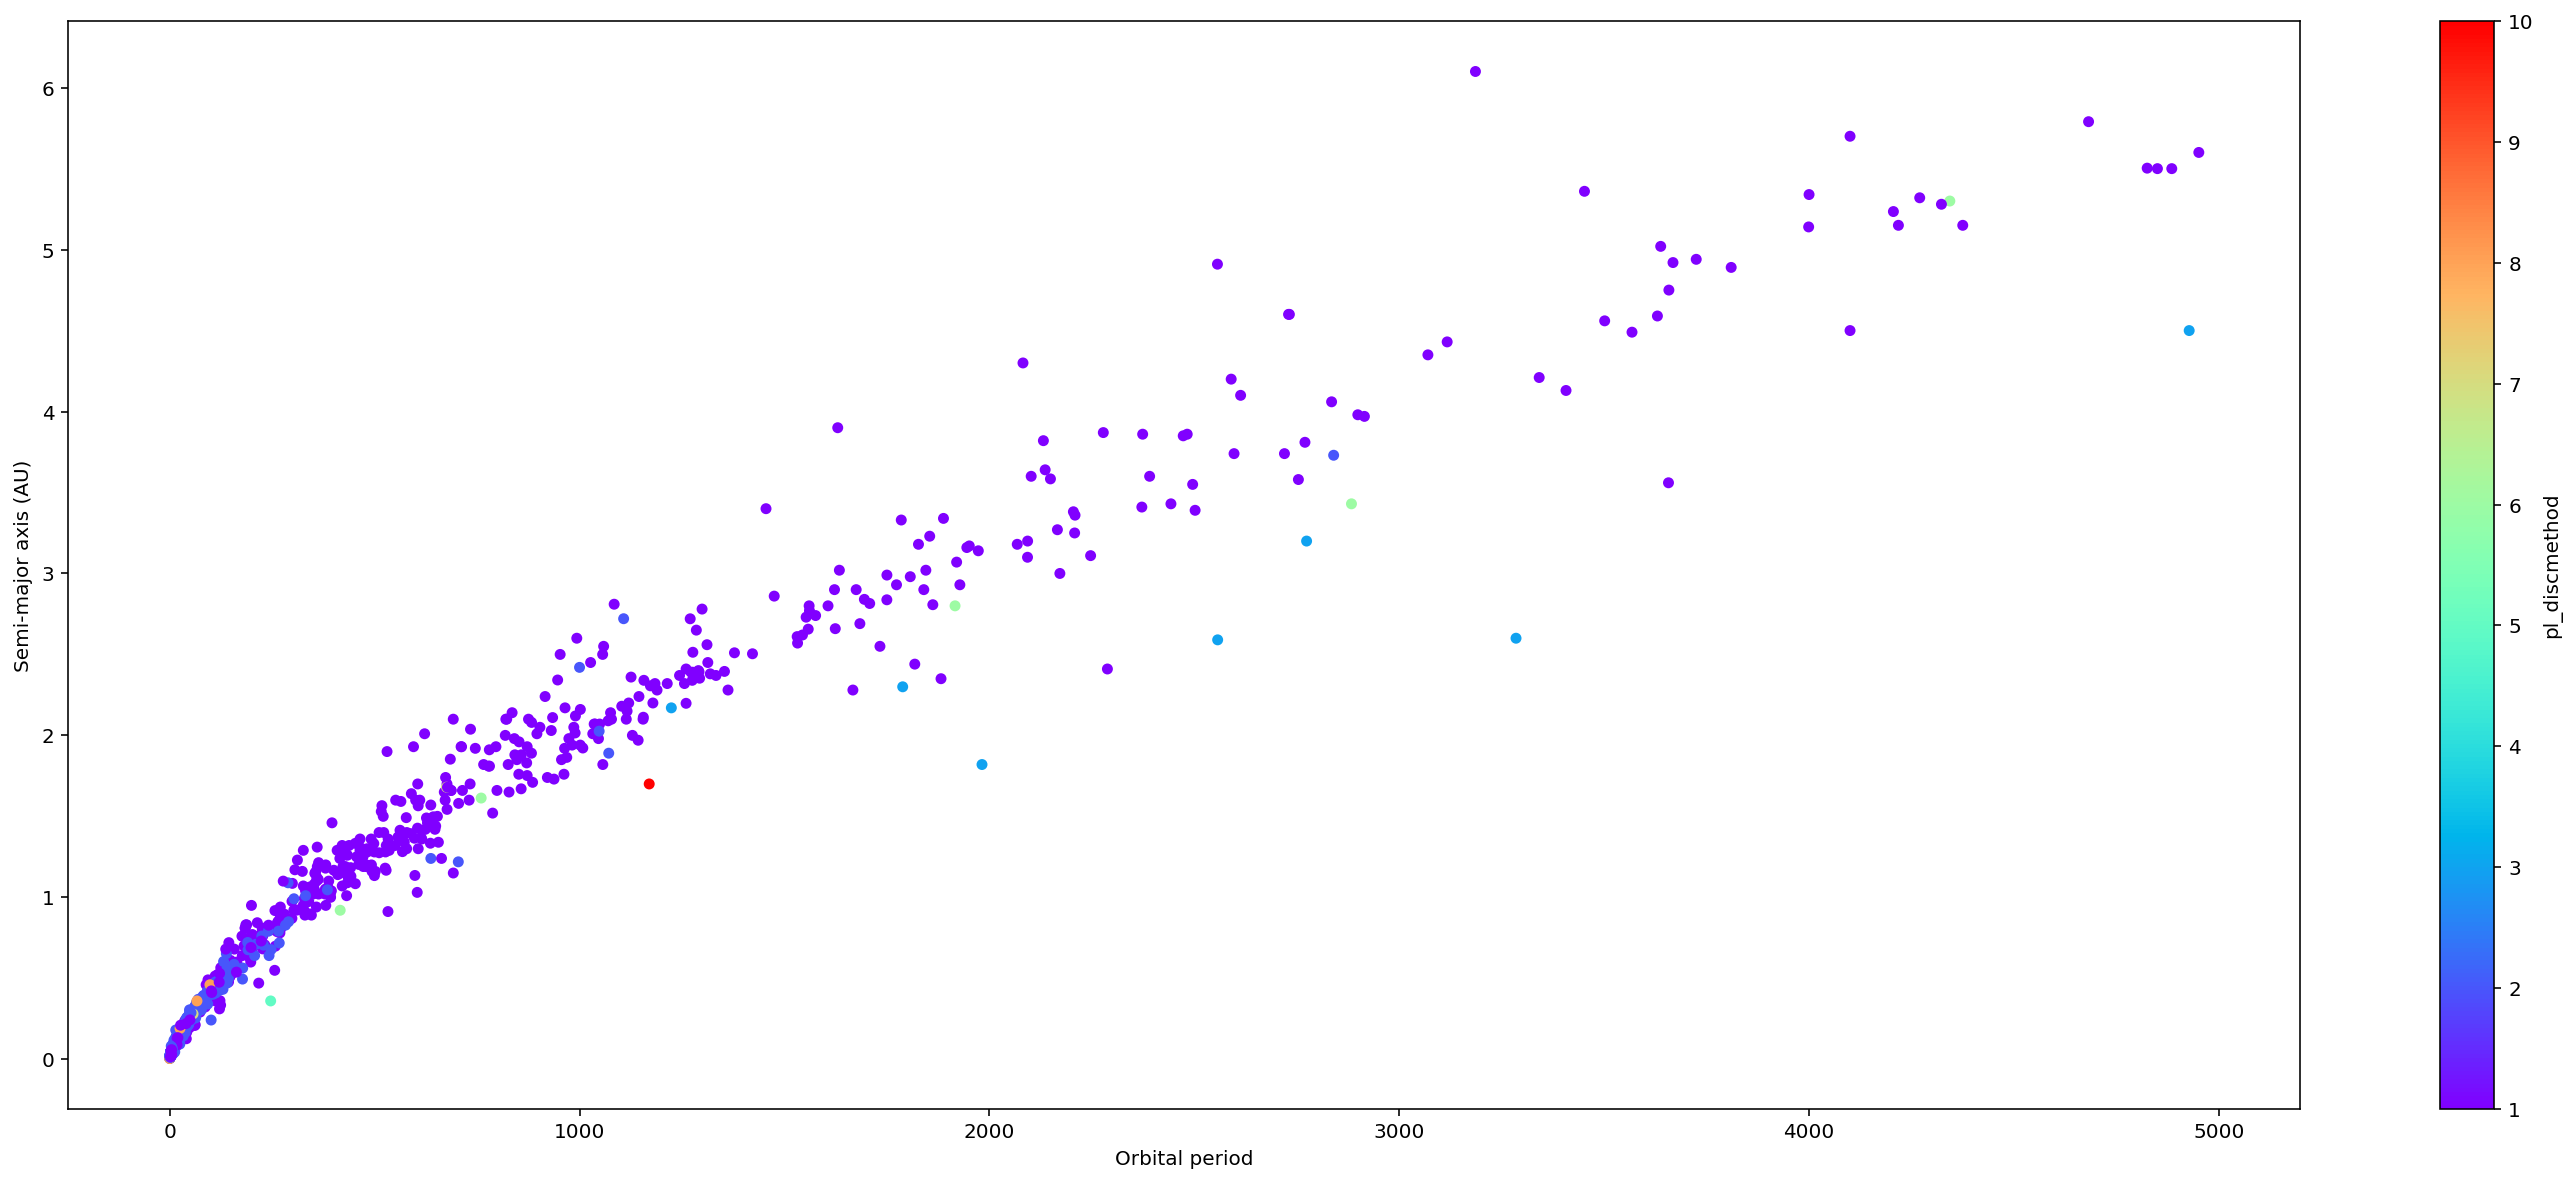

In [217]:
fig, ax = plt.subplots()

radiusPeriod.plot(kind='scatter',x='pl_orbper', y='pl_orbsmax', c='pl_discmethod', ax=ax, colormap='rainbow',figsize=(25, 10)) #Plots scatter graph
ax.set_xlabel("Orbital period")
ax.set_ylabel("Semi-major axis (AU)")
plt.show()

The above graph..

In [156]:
radiusPeriodStarMass = oec[["pl_orbsmax", "pl_orbper", "st_mass", "pl_discmethod"]]
StringToNum(radiusPeriodStarMass)

radiusPeriodStarMass = radiusPeriodStarMass[pd.notnull(radiusPeriodStarMass['pl_orbsmax'])]
radiusPeriodStarMass = radiusPeriodStarMass[pd.notnull(radiusPeriodStarMass['pl_orbper'])]
radiusPeriodStarMass = radiusPeriodStarMass[pd.notnull(radiusPeriodStarMass['st_mass'])]
radiusPeriodStarMass = radiusPeriodStarMass[pd.notnull(radiusPeriodStarMass['pl_discmethod'])]

radiusPeriodStarMass["pl_orbsmax"] = radiusPeriodStarMass["pl_orbsmax"] ** 3
radiusPeriodStarMass["pl_orbper"] = radiusPeriodStarMass["pl_orbper"] ** 2

In [157]:
radiusPeriodStarMass = radiusPeriodStarMass[radiusPeriodStarMass['pl_orbsmax'] < 50]
radiusPeriodStarMass = radiusPeriodStarMass[radiusPeriodStarMass['pl_orbper'] < 50]
radiusPeriodStarMass = radiusPeriodStarMass[radiusPeriodStarMass['st_mass'] < 50]

Text(0.5,0,'Host star mass (Solar masses)')

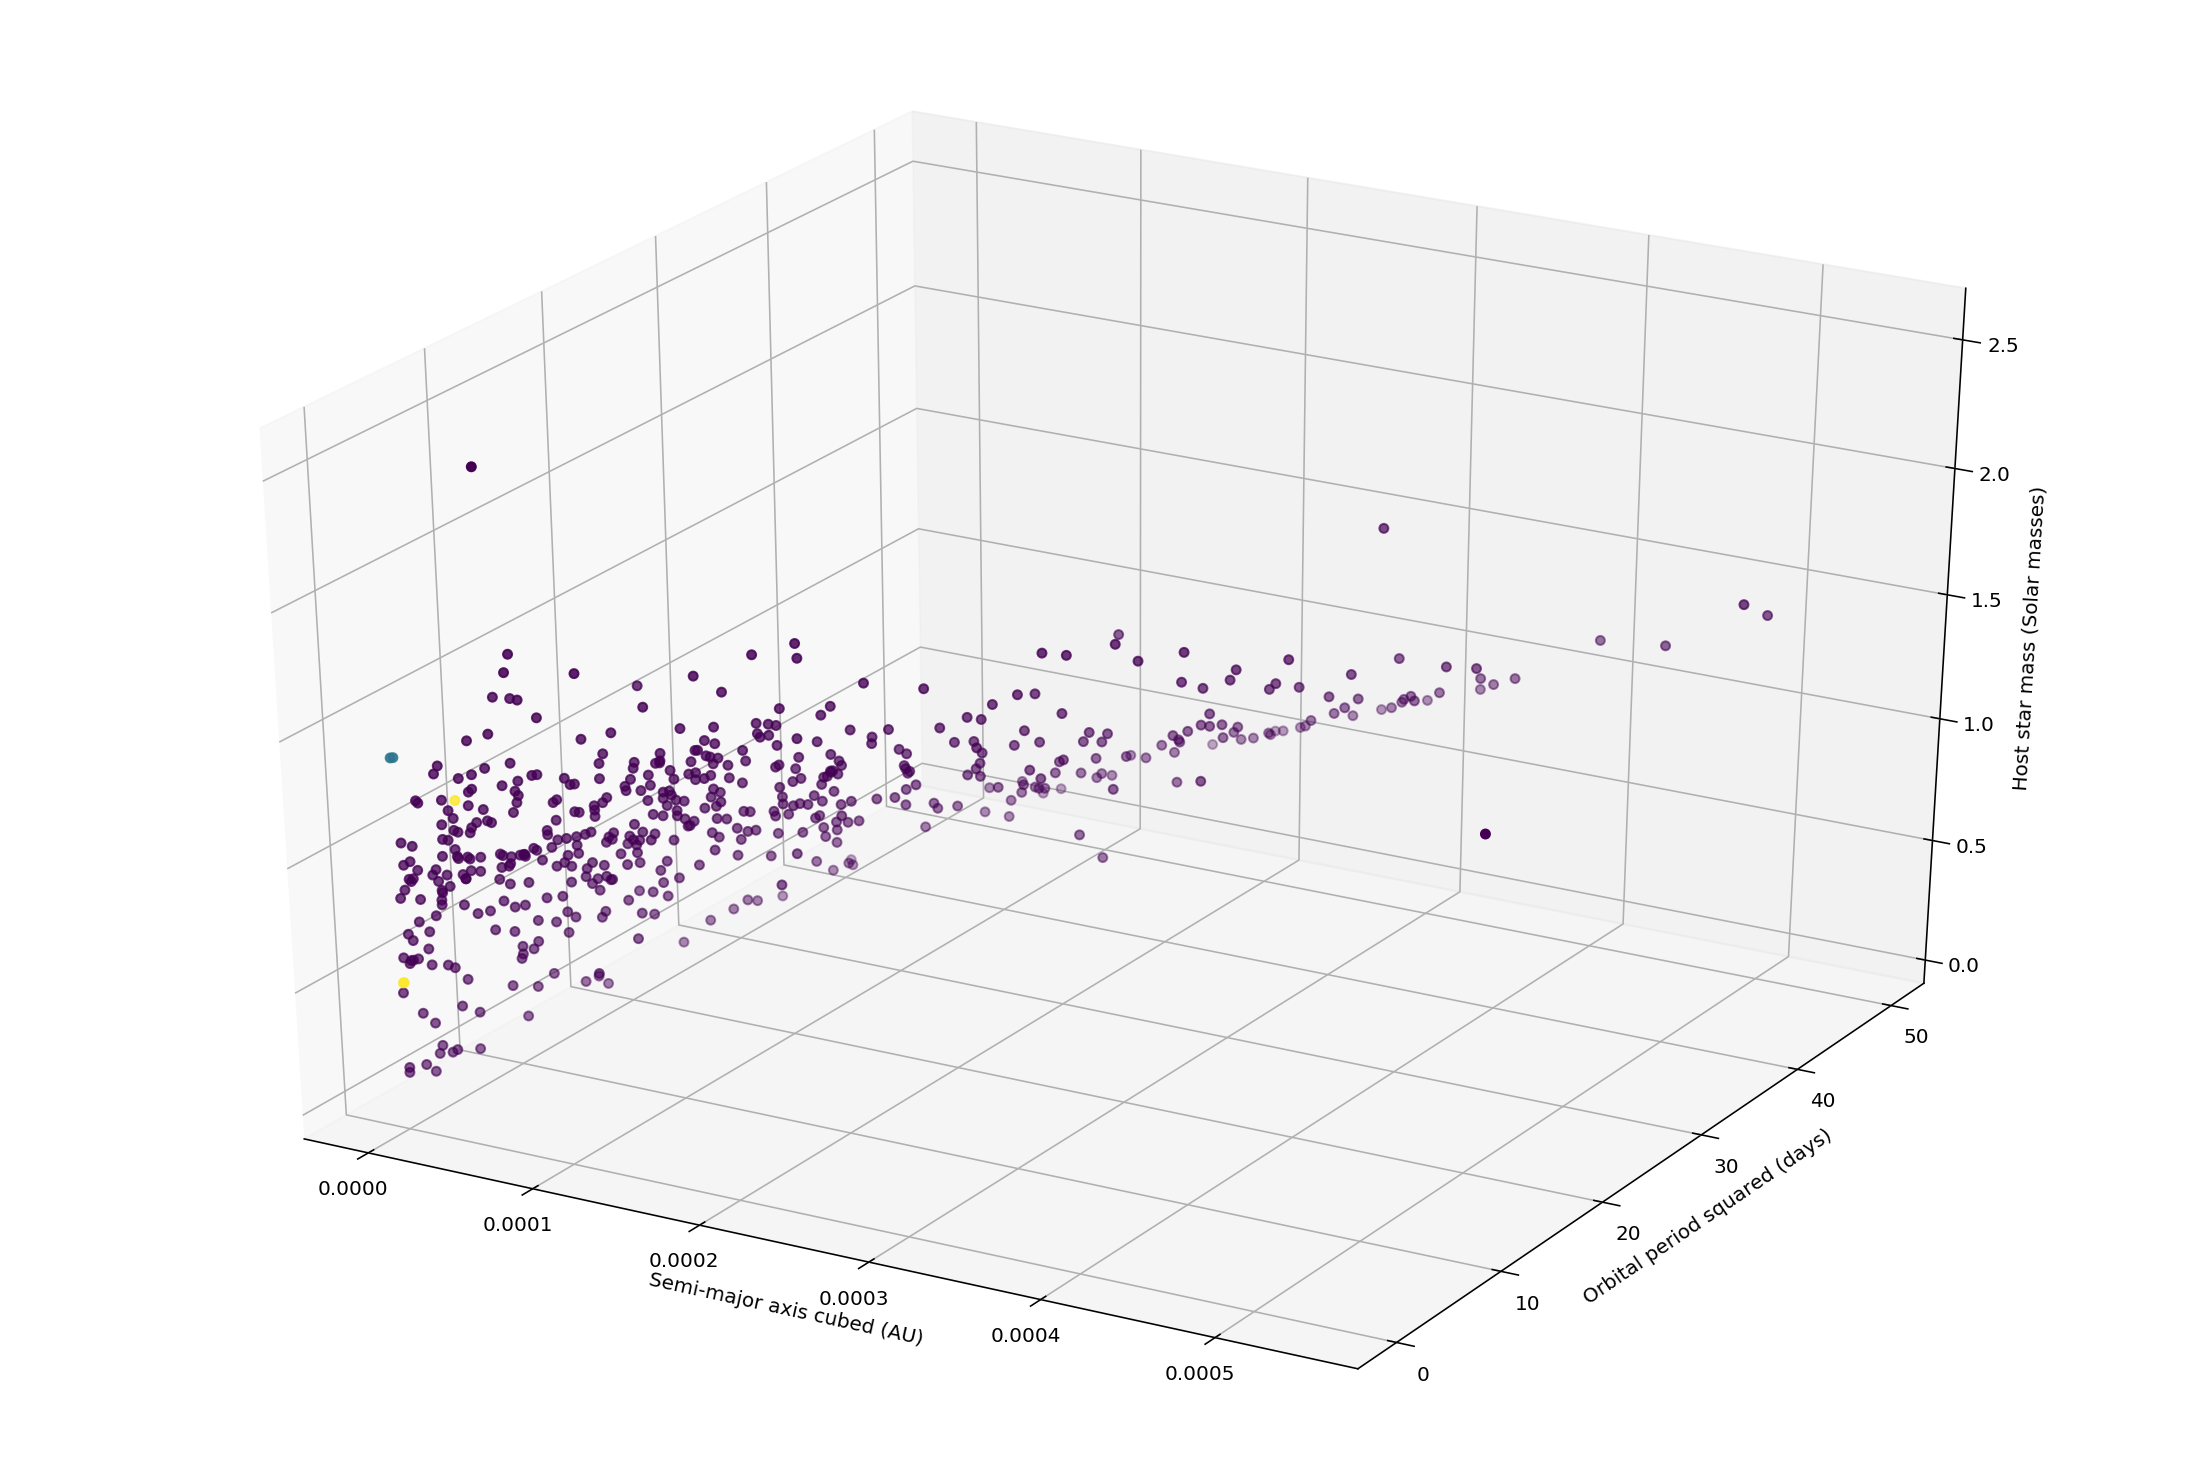

In [158]:
fig = plt.figure(figsize=(15, 10))
ax = Axes3D(fig)

ax.scatter(radiusPeriodStarMass['pl_orbsmax'], radiusPeriodStarMass['pl_orbper'], radiusPeriodStarMass['st_mass'], c=radiusPeriodStarMass['pl_discmethod'])
ax.set_xlabel("Semi-major axis cubed (AU)")
ax.set_ylabel("Orbital period squared (days)")
ax.set_zlabel("Host star mass (Solar masses)")